Questao 1

a) Visualizacao e analise analitica

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\p'
C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_14064\2740630738.py:31: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, f, 'b-', label='$f(x) = \sin(2\pi x)$', linewidth=2)
C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_14064\2740630738.py:32: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Função $f(x) = \sin(2\pi x)$')
C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_14064\2740630738.py:42: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, F_analitica, 'r-', label='$F(x) = -\\frac{1}{2\pi}\cos(2\pi x) + \\frac{1}{2\pi}$', linewidth=2)


Resultados Analíticos:
Valor da primitiva em F(0): 0.000000
Valor da primitiva em F(1): 0.000000
Integral definida de 0 a 1: 0.000000


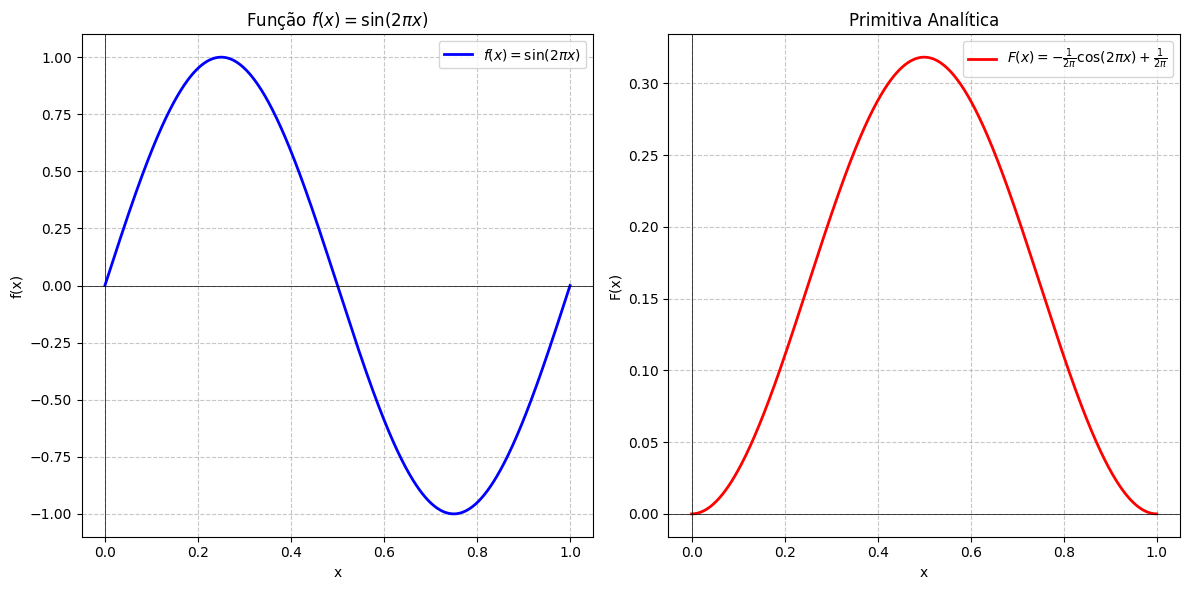

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#dominio da funcao
N = 1001 # numero de pontos
x = np.linspace(0, 1, N)
dx = x[1] - x[0] 

#f(x)
f = np.sin(2 * np.pi * x)

#primitiva analitica
C = 1/(2*np.pi)  # isso pois -1/(2π) * cos(0) + C = 0  => C = 1/(2π)
F_analitica = -1/(2*np.pi) * np.cos(2 * np.pi * x) + C

#integral analitica
integral_analitica = 0.0 #volta completa do seno

#resultados analiticos
print("Resultados Analíticos:")
print(f"Valor da primitiva em F(0): {F_analitica[0]:.6f}")
print(f"Valor da primitiva em F(1): {F_analitica[-1]:.6f}")
print(f"Integral definida de 0 a 1: {F_analitica[-1] - F_analitica[0]:.6f}")


#visualizacao
plt.figure(figsize=(12, 6))

# funcao
plt.subplot(1, 2, 1)
plt.plot(x, f, 'b-', label='$f(x) = \sin(2\pi x)$', linewidth=2)
plt.title('Função $f(x) = \sin(2\pi x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

# primitiva
plt.subplot(1, 2, 2)
plt.plot(x, F_analitica, 'r-', label='$F(x) = -\\frac{1}{2\pi}\cos(2\pi x) + \\frac{1}{2\pi}$', linewidth=2)
plt.title('Primitiva Analítica')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

    

b) Metodo do trapezio

In [9]:
#Parametros
n = 10  # subintervalos
a, b = 0, 1  # limites de integracao
h = (b - a)/n  

#pontos 
x = np.linspace(a, b, n+1)

#calculando f nos pontos
f = np.sin(2 * np.pi * x)

# regra do trapezio
integral_trapezio = (h/2) * (f[0] + 2 * np.sum(f[1:-1]) + f[-1])

# erro absoluto
erro_absoluto = np.abs(integral_trapezio - integral_analitica)

print(f"Resultado da regra do trapézio (n={n}): {integral_trapezio:.10f}")
print(f"Erro absoluto: {erro_absoluto:.10f}")


Resultado da regra do trapézio (n=10): -0.0000000000
Erro absoluto: 0.0000000000


c) Simpson

Metodo de Simpson (n=10):
Resultado: -0.0000000000
Erro absoluto: 0.0000000000

Comparacao com a regra do trapezio:
Diferenca entre metodos: 0.0000000000


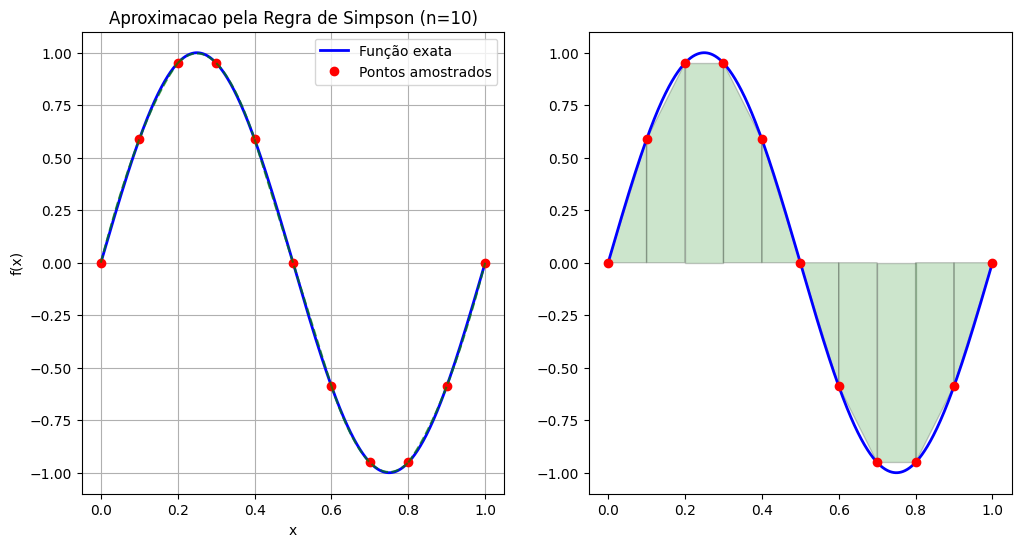

In [13]:
# parametros
n = 10  #subintervalos (par)
a, b = 0, 1  # limites 
h = (b - a)/n 

# Pontos x
x = np.linspace(a, b, n+1)

# funcao nos pontos
f = np.sin(2 * np.pi * x)

# regra de Simpson (n deve ser par)
integral_simpson = (h/3) * (f[0] + 4*np.sum(f[1:-1:2]) + 2*np.sum(f[2:-2:2]) + f[-1])

# erro absoluto de Simpson
erro_absoluto_simpson = np.abs(integral_simpson - 0.0)  # valor analítico = 0

# resultados anteriores
integral_trapezio = 0.0  # resultado obtido anteriormente
erro_trapezio = 0.0

print("Metodo de Simpson (n=10):")
print(f"Resultado: {integral_simpson:.10f}")
print(f"Erro absoluto: {erro_absoluto_simpson:.10f}")

print("\nComparacao com a regra do trapezio:")
print(f"Diferenca entre metodos: {np.abs(integral_simpson - integral_trapezio):.10f}")

# VIZUU
plt.figure(figsize=(12, 6))

# Grafico de f com a aproximacao de Simpson
plt.subplot(1, 2, 1)
plt.plot(np.linspace(a, b, 1000), np.sin(2 * np.pi * np.linspace(a, b, 1000)), 
         'b-', label='Função exata', linewidth=2)

# destaque dos pontos
plt.plot(x, f, 'ro', label='Pontos amostrados')

# Desenhar parabolas aproximadas em cada par de subintervalos
for i in range(0, n, 2):
    xi = x[i:i+3]
    fi = f[i:i+3]
    coeffs = np.polyfit(xi, fi, 2)
    x_fit = np.linspace(xi[0], xi[2], 50)
    y_fit = np.polyval(coeffs, x_fit)
    plt.plot(x_fit, y_fit, 'g--', alpha=0.7)

plt.title('Aproximacao pela Regra de Simpson (n=10)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Comparacaoo com o metodo do trapezio 
plt.subplot(1, 2, 2)
plt.plot(np.linspace(a, b, 1000), np.sin(2 * np.pi * np.linspace(a, b, 1000)), 
         'b-', label='Função exata', linewidth=2)
plt.plot(x, f, 'ro', label='Pontos amostrados')

# Desenhar trapezios
for i in range(n):
    plt.fill([x[i], x[i], x[i+1], x[i+1]], 
             [0, f[i], f[i+1], 0], 'g', alpha=0.2, edgecolor='k')




d) metodo adaptativo

In [16]:
import numpy as np

# parametros
a, b = 0, 1  # limites 
epsilon = 1e-6  # precisão desejada
n = 2  # número inicial de subintervalos (par))
max_iter = 20  # max iteracoes
integral_prev = 0  # valor anterior da integral

print("Iteração | Subintervalos | Estimativa da Integral | Diferença")
print("--------|--------------|-----------------------|----------")

for iteration in range(max_iter):
    h = (b - a)/n
    x = np.linspace(a, b, n+1)
    f = np.sin(2*np.pi*x)
    
    # Regra de Simpson composta
    integral = (h/3) * (f[0] + 4*np.sum(f[1:-1:2]) + 2*np.sum(f[2:-2:2]) + f[-1])
    
    # diferença em relação à iteracao anterior
    difference = np.abs(integral - integral_prev) if iteration > 0 else np.inf
    
    print(f"{iteration+1:7d} | {n:12d} | {integral:21.10f} | {difference:.2e}")
    
    # Criterio de convergencia
    if difference < epsilon:
        break
        
    integral_prev = integral
    n *= 2  # dobra o numero de subintervalos

print("\nResultado final:")
print(f"Integral estimada: {integral:.10f}")
print(f"Subintervalos utilizados: {n}")
print(f"Número de iterações: {iteration+1}")



Iteração | Subintervalos | Estimativa da Integral | Diferença
--------|--------------|-----------------------|----------
      1 |            2 |          0.0000000000 | inf
      2 |            4 |          0.0000000000 | 4.08e-17

Resultado final:
Integral estimada: 0.0000000000
Subintervalos utilizados: 4
Número de iterações: 2
